<a href="https://colab.research.google.com/github/Pragna235/ACM-Winter-School-Assignment-3/blob/main/Assignment_3_DermaMnist_Dataset_Analysis_using_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Packages

In [42]:
!pip install medmnist
!pip install Pillow

# Import Package

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [44]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [45]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.2.3 @ https://github.com/MedMNIST/MedMNIST/


In [46]:
# import dataset_without_pytorch

# from dataset_without_pytorch import get_loader


# Parameters

In [47]:
epoch = 2
learning_rate = 0.001
batch_size = 32
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_used = tf.keras.losses.CategoricalCrossentropy()

# Load Dataset

In [48]:
from medmnist import DermaMNIST

First, we read the data, preprocess them and encapsulate them into dataloader form.

# Training Set

In [49]:
# load the data
train_dataset = DermaMNIST(split='train', download=True)
train_dataset

Using downloaded and verified file: /root/.medmnist/dermamnist.npz


Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0

In [50]:
print("Number of samples in the training dataset = ",len(train_dataset))
print(train_dataset[0]) # Every sample in the dataset is a tuple containing 2 values - image & label
print(train_dataset[0][0]) #image
print("Size of the image = ",train_dataset[0][0].size)
print("Example Label = ",train_dataset[0][1]) #label

Number of samples in the training dataset =  7007
(<PIL.Image.Image image mode=RGB size=28x28 at 0x7ED4C7D67610>, array([0]))
<PIL.Image.Image image mode=RGB size=28x28 at 0x7ED4C7D674C0>
Size of the image =  (28, 28)
Example Label =  [0]


In [51]:
def montage(self, length=20, replace=False, save_folder=None):
        from medmnist.utils import montage2d

        n_sel = length * length
        sel = np.random.choice(self.__len__(), size=n_sel, replace=replace)

        montage_img = montage2d(imgs=self.imgs,
                                n_channels=self.info['n_channels'],
                                sel=sel)

        if save_folder is not None:
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)
            montage_img.save(os.path.join(save_folder,
                                          f"{self.flag}_{self.split}_montage.jpg"))

        return montage_img

In [52]:
train_dataset.montage(length=1)

/usr/local/lib/python3.10/dist-packages/medmnist/utils.py:31: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


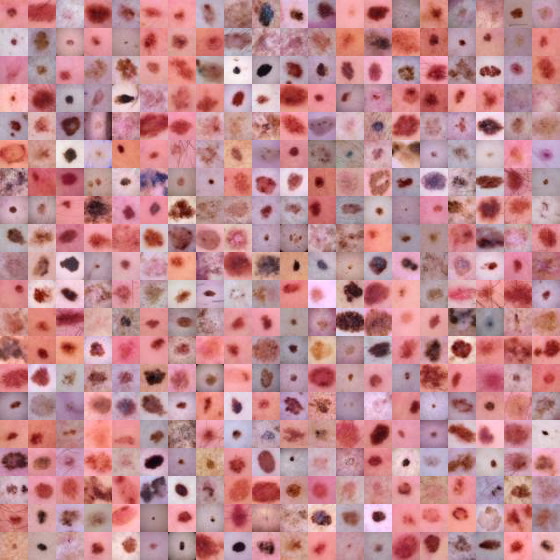

In [53]:
train_dataset.montage(length=20)

In [54]:
x, y = train_dataset[0] #x = image, y = label
print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [63]:
# In a way,we are finding the value_counts of the target variable

print("length of train_dataset = ",len(train_dataset))
class_count = [0,0,0,0,0,0,0] #we have a total of 8 classes (0-6)
for i in range(0,len(train_dataset)):
  x,y = train_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

length of train_dataset =  7007
[228, 359, 769, 80, 779, 4693, 99]


In [64]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print("Shape of the image = ",im.shape)
img = Image.fromarray(im)
img

Shape of the image =  (28, 28, 3)


In [65]:
no_of_class = 7

#This code snippet appears to be a Python function named read_data. It takes a parameter data, which is assumed to be a list of tuples. Each tuple contains two elements: the first element is an array x (presumably representing input data), and the second element is another array y (presumably representing labels or classes). The function processes this data and converts it into a format suitable for training a neural network.

def read_data(data):
  # Extracts the first tuple from the data list and assigns its elements to variables x and y.
  x,y = data[0]
  # Converts x (presumed to be an array) into a NumPy array.
  x = np.array(x) #(28,28,3)
  # Creates a new NumPy array data_x_new filled with zeros. This array will store the input data in a reshaped format.
  data_x_new = np.zeros((len(data),x.shape[0],x.shape[1],x.shape[2]),dtype=float)
  # Creates a new NumPy array data_y_new filled with zeros. This array will store the one-hot encoded labels.
  data_y_new = np.zeros((len(data),no_of_class),dtype=float)

  #  It iterates over each tuple in the data list.
  for i in range(0,len(data)):
    # Extracts the current tuple's elements into x and y.
    x,y = data[i]
    # Converts x into a NumPy array x_new.
    x_new = np.asarray(x)
    # Creates a new NumPy array y_new filled with zeros. This will be used to represent the one-hot encoded label.
    y_new = np.zeros(no_of_class,dtype=float)
    # Sets the element at the index specified by y[0] to 1 in the y_new array. This creates a one-hot encoded representation of the class label.
    y_new[y[0]] = 1
    # Assigns the reshaped input data to the i-th row of data_x_new.
    data_x_new[i]=x_new
    # Assigns the one-hot encoded label to the i-th row of data_y_new.
    data_y_new[i]=y_new

  # returns data_x_new and data_y_new, representing the preprocessed input data and corresponding labels, respectively.
  return data_x_new,data_y_new

In [66]:
train_x, train_y = read_data(train_dataset)
print(train_x.shape,train_y.shape)

(7007, 28, 28, 3) (7007, 7)


In [67]:
print(train_x[0])
print()
print(train_y[0])

[[[158. 111. 117.]
  [161. 116. 121.]
  [164. 121. 130.]
  ...
  [189. 160. 164.]
  [187. 158. 160.]
  [186. 157. 159.]]

 [[160. 113. 119.]
  [165. 120. 125.]
  [170. 129. 137.]
  ...
  [191. 162. 166.]
  [189. 160. 162.]
  [188. 159. 161.]]

 [[164. 119. 124.]
  [170. 128. 132.]
  [177. 137. 145.]
  ...
  [191. 162. 166.]
  [188. 162. 165.]
  [187. 161. 164.]]

 ...

 [[172. 142. 150.]
  [176. 147. 152.]
  [182. 150. 155.]
  ...
  [195. 167. 164.]
  [181. 153. 150.]
  [171. 143. 140.]]

 [[176. 147. 152.]
  [176. 147. 152.]
  [180. 148. 153.]
  ...
  [188. 160. 157.]
  [178. 150. 147.]
  [171. 143. 140.]]

 [[175. 146. 151.]
  [173. 144. 149.]
  [174. 142. 147.]
  ...
  [180. 152. 149.]
  [175. 147. 144.]
  [173. 145. 142.]]]

[1. 0. 0. 0. 0. 0. 0.]


# Validation Set


In [68]:
# load the data
val_dataset = DermaMNIST(split='val', download=True)

print(val_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 1003
    Root location: /root/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [69]:
x, y = val_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


In [71]:
print(len(val_dataset))
class_count = [0,0,0,0,0,0,0]
for i in range(0,len(val_dataset)):
  x,y = val_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

1003
[33, 52, 110, 12, 111, 671, 14]


In [72]:
from PIL import Image

im = np.asarray(train_dataset[0][0])
print(im.shape)
img = Image.fromarray(im)
img

(28, 28, 3)


In [73]:
val_x, val_y = read_data(val_dataset)
print(val_x.shape,val_y.shape)

(1003, 28, 28, 3) (1003, 7)


# Test Set

In [74]:
# load the data
test_dataset = DermaMNIST(split='test', download=True)

print(test_dataset)

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 2005
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0


In [75]:
x, y = test_dataset[0]

print(np.array(x).shape, y.shape)
print(y)

(28, 28, 3) (1,)
[5]


In [77]:
print(len(test_dataset))
class_count = [0,0,0,0,0,0,0]
for i in range(0,len(test_dataset)):
  x,y = test_dataset[i]
  # print(type(y))
  # print(y)
  # print(len(y))
  class_count[y[0]]+=1
print(class_count)

2005
[66, 103, 220, 23, 223, 1341, 29]


In [78]:
test_x, test_y = read_data(test_dataset)
print(test_x.shape,test_y.shape)

(2005, 28, 28, 3) (2005, 7)


# Neural Networks


In [79]:
from tensorflow.keras import models, layers

Here, we are creating a Feed Forward Neural Network

In [84]:
# This line defines the input layer for the neural network. The shape=(28, 28, 3,) argument indicates that the input data is expected to have a shape of 28x28 pixels with 3 color channels (RGB).
input_layers = layers.Input(shape=(28,28,3,))

# This line flattens the input data. It transforms the 3D input into a 1D array, which is often necessary when transitioning from convolutional layers to fully connected layers in a neural network.
y = layers.Flatten()(input_layers)
#  This line adds a fully connected (dense) layer with 1024 units and a rectified linear unit (ReLU) activation function. The output of the previous layer (y) serves as the input to this layer.
y = layers.Dense(1024,activation=tf.nn.relu)(y)
y = layers.Dense(512,activation=tf.nn.relu)(y)
y = layers.Dense(256,activation=tf.nn.relu)(y)
y = layers.Dense(128,activation=tf.nn.relu)(y)
y = layers.Dense(64,activation=tf.nn.relu)(y)
y = layers.Dense(32,activation=tf.nn.relu)(y)
y = layers.Dense(16,activation=tf.nn.relu)(y)

# This line adds the final output layer with 8 units (assuming 8 classes) and a softmax activation function. The softmax function is often used in multi-class classification problems to convert the raw model output into probability scores for each class.
output_layers = layers.Dense(7,activation='softmax')(y)
# This line creates a Keras Model by specifying the input and output layers. The nn_model is the resulting neural network model that can be compiled, trained, and used for making predictions.
nn_model = tf.keras.Model(inputs = input_layers, outputs = output_layers)

In [85]:
nn_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 2352)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              2409472   
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 64)                8256

This line of code compiles the neural network model using the Keras API in TensorFlow. Let's break down the components of this line:

In [86]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)
# The optimizer is responsible for updating the weights of the neural network during training in order to minimize the defined loss function.

In [87]:
nn_history = nn_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))
#epoch : This parameter specifies the number of times the entire training dataset is processed by the neural network during training. Each pass through the entire dataset is called an epoch.

Epoch 1/2
219/219 [==============================] - 12s 46ms/step - loss: 8.2728 - accuracy: 0.6227 - val_loss: 1.7718 - val_accuracy: 0.6690
Epoch 2/2
219/219 [==============================] - 11s 49ms/step - loss: 1.6840 - accuracy: 0.6698 - val_loss: 1.6019 - val_accuracy: 0.6690


In [88]:
score = nn_model.evaluate(test_x, test_y)
print(score)

63/63 [==============================] - 1s 9ms/step - loss: 1.6020 - accuracy: 0.6688
[1.6019799709320068, 0.6688279509544373]


# VGG - Visual Geometry Group ( a specific type of CNN )

Visualize Convolution: https://poloclub.github.io/cnn-explainer/

about filters: https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html

In [90]:
from tensorflow.keras import models, layers

In [91]:
# This line initializes a sequential model using Keras. A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
vgg_model = tf.keras.Sequential()

vgg_model.add(layers.Input((28,28,3)))
# This adds a zero-padding layer to the model. Zero-padding is added to both the height and width dimensions, effectively increasing the spatial dimensions of the input tensor. In this case, it pads the input with 2 pixels on all sides.
vgg_model.add(layers.ZeroPadding2D((2,2)))

vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))

vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))

vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
vgg_model.add(layers.MaxPool2D((2,2),strides=2))

vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(4096,activation='relu'))
vgg_model.add(layers.Dense(256,activation='relu'))
vgg_model.add(layers.Dense(7,activation='softmax'))

In [92]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [93]:
vgg_history = vgg_model.fit(train_x,train_y,epochs=epoch,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))

Epoch 1/2
219/219 [==============================] - 196s 884ms/step - loss: 1.1269 - accuracy: 0.6638 - val_loss: 0.9523 - val_accuracy: 0.6690
Epoch 2/2
219/219 [==============================] - 187s 856ms/step - loss: 0.9426 - accuracy: 0.6725 - val_loss: 0.9057 - val_accuracy: 0.6839


In [94]:
score = vgg_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[0.8952429890632629, 0.6882793307304382]


In [95]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 32, 32, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

# ResNet

Visualize CNN models: https://adamharley.com/nn_vis/cnn/3d.html

In [96]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import resnet50

In [97]:
input_layer=layers.Input(shape=(28,28,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=True)
resnet_model.summary()
last_layer = resnet_model.get_layer('avg_pool').output

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                    

In [98]:
flatten=layers.Flatten()(last_layer)
output_layer=layers.Dense(no_of_class,activation='softmax')(flatten)
rs50_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [99]:
rs50_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 34, 34, 3)            0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 14, 14, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 14, 14, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [100]:
rs50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'],)

In [101]:
rs50_history = rs50_model.fit(train_x,train_y,epochs=epoch-1,batch_size=batch_size,verbose=True,validation_data=(val_x,val_y))

219/219 [==============================] - 526s 2s/step - loss: 1.0951 - accuracy: 0.6759 - val_loss: 192.5079 - val_accuracy: 0.6461


In [102]:
score = rs50_model.evaluate(test_x, test_y, verbose = 0)
print(score)

[195.33883666992188, 0.6453865170478821]
